# Single Neural Logistic Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

In [3]:
# Import Penguin Dataset as a Dataframe object
pg = pd.read_csv("https://raw.githubusercontent.com/yw110-1/INDE-577/main/Data/penguins.csv")
pg = pg.dropna()
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


Here we would like to show linearly and non-linearly separable data.

In [4]:
adelie = pg[pg['species'] == "Adelie"]
gentoo = pg[pg['species'] == "Gentoo"]
chinstrap = pg[pg['species'] == "Chinstrap"]
torgersen = pg[pg['island'] == "Torgersen"]
dream = pg[pg['island'] == "Dream"]
biscoe = pg[pg['island'] == "Biscoe"]
pg.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

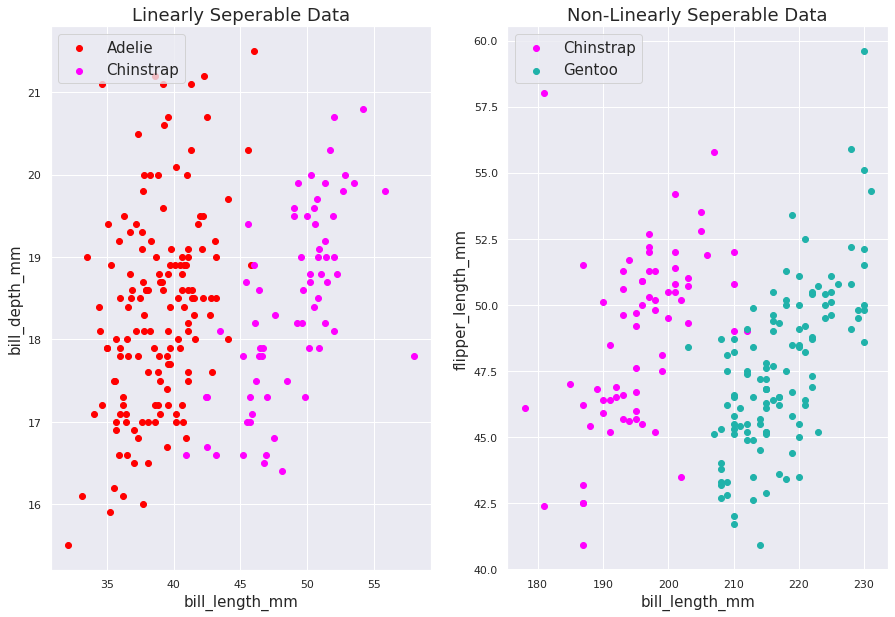

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "red", 
            label = "Adelie")
ax1.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "magenta", 
            label = "Chinstrap")
ax1.set_xlabel("bill_length_mm", fontsize = 15)
ax1.set_ylabel("bill_depth_mm", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)

# ax2.scatter(adelie.bill_length_mm,
#             adelie.flipper_length_mm, 
#             color = "magenta", 
#             label = "Adelie")
# ax2.scatter(gentoo.bill_length_mm, 
#             gentoo.flipper_length_mm,  
#             color = "lightseagreen", 
#             label = "Gentoo")
ax2.scatter(chinstrap.flipper_length_mm, 
            chinstrap.bill_length_mm,
            color = "magenta", 
            label = "Chinstrap")
ax2.scatter(gentoo.flipper_length_mm,
            gentoo.bill_length_mm, 
            color = "lightseagreen", 
            label = "Gentoo")
ax2.set_xlabel("bill_length_mm", fontsize = 15)
ax2.set_ylabel("flipper_length_mm", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()


We will build the single neuron class and define sigmoid activation function and MSE cost function. The sigmoid activation functionis visualized as below.

In [6]:
# Single Neuron Class
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        return fig

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

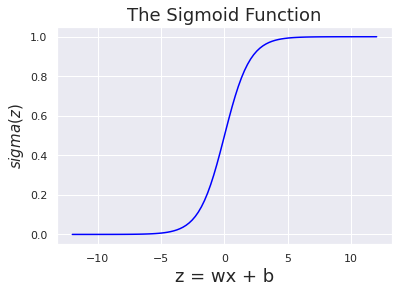

In [62]:
# Define sigmoid activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Define MSE cost function
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


domain = np.linspace(-12.0, 12.0, 100)
plt.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
plt.xlabel("z = wx + b", fontsize = 18)
plt.ylabel("$sigma(z)$", fontsize = 15)
plt.title("The Sigmoid Function", fontsize = 18)
plt.show()

In [71]:
# X = pg[(pg['species'] == 'Adelie') | (pg['species'] == 'Gentoo')]
# y = np.where(X.species == "Adelie", 0, 1)
# X = X[['bill_depth_mm','flipper_length_mm']].values
# X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

X = pg[(pg['species'] != 'Adelie')].bill_depth_mm.values
X = X.reshape(-1, 1)
y = np.where(pg[(pg['species'] != 'Adelie')].species == "versicolor", 0, 1)

In [74]:
node = SingleNeuron(sigmoid, cross_entropy_loss)
node.train(X, y, alpha = 0.01, epochs = 50)
# node.train(X_train, y_train, alpha = 0.01, epochs = 10_000)

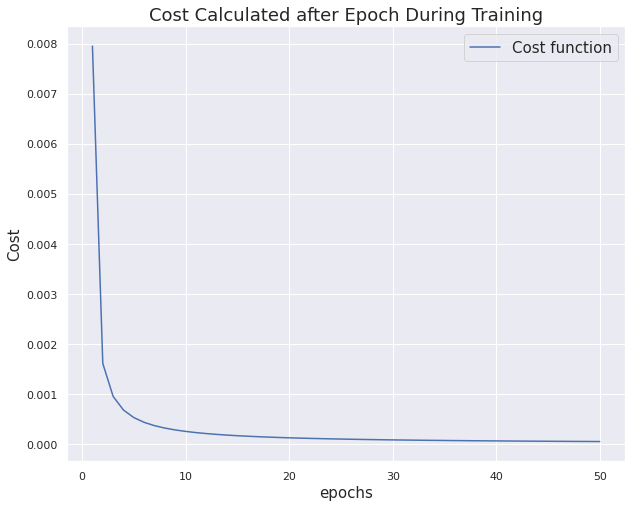

In [75]:
node.plot_cost_function()
plt.show()


Now that we have trained the variable ```node```, we can now visualize the binary cross entropy loss over each epoch by plotting the values in the ```SingleNeuron.errors_``` attribute. This can be done by running the following code in the cell below.

In [44]:
node.predict(X)

array([2.02654166e-34, 1.56309458e-20, 1.58625299e-19, 1.90818522e-31,
       5.07040520e-44, 4.47532740e-27, 1.39395674e-32, 8.68292676e-25,
       2.91623431e-48, 7.44066292e-43, 1.87987312e-24, 1.09722446e-27,
       3.01867591e-40, 5.27541247e-30, 9.64444223e-49, 9.55003156e-36,
       4.47640740e-35, 2.97388725e-33, 6.70047274e-27, 7.78117289e-23,
       4.07094963e-32, 2.71903686e-32, 5.88535551e-24, 1.66084786e-39,
       1.04451387e-36, 4.56490442e-20, 1.71919020e-31, 1.74424036e-22,
       4.38750814e-34, 2.29323958e-11, 3.63044422e-44, 3.99106546e-39,
       1.91842577e-33, 2.57459755e-39, 1.02377033e-35, 4.72754148e-28,
       8.63657732e-23, 1.65158370e-29, 9.63978907e-33, 4.15143090e-17,
       2.47275575e-29, 3.27007998e-36, 5.46072738e-22, 2.91623431e-48,
       5.57137211e-23, 1.84298440e-31, 5.46072738e-22, 1.73534828e-28,
       1.37327435e-25, 4.79758354e-27, 2.38768791e-21, 2.29434653e-27,
       2.77279128e-17, 3.70221685e-29, 4.15143090e-17, 8.01925155e-45,
      

In [45]:
np.rint(node.predict(X)) != y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [49]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.0


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


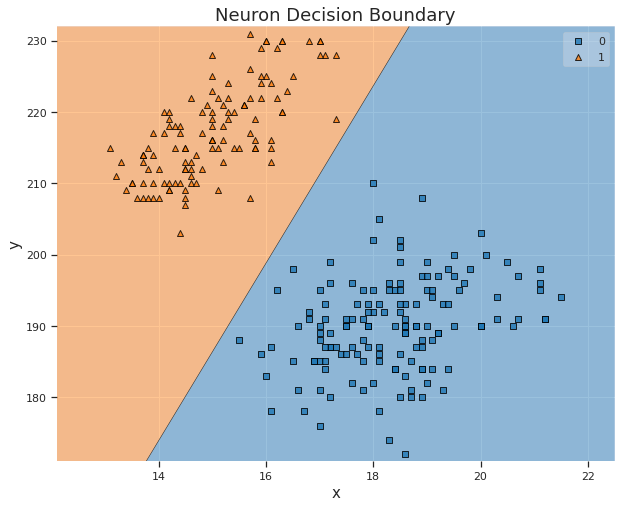

In [48]:
node.plot_decision_boundary(X, y)
plt.show()